# Random forest classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Import of data based on feature selection resutls

In [2]:
from utils import cleanup_dataset_apply_standard_scaler
X = pd.read_table('../data/data/x_train.txt', header=None, delimiter=' ')
y = pd.read_table('../data/data/y_train.txt', header=None)
X_test_submission = pd.read_table('../data/data/x_test.txt', header=None, delimiter=' ')

# based on feature selection investigation
selected_features = [100, 101, 102, 103, 104, 105]
X = X[selected_features]
X_test_submission = X_test_submission[selected_features]

X = cleanup_dataset_apply_standard_scaler(X)
X_test_submission = cleanup_dataset_apply_standard_scaler(X_test_submission)

In [3]:
from sklearn.ensemble import RandomForestClassifier

def apply_optimized_forest(
        X: pd.DataFrame,
        y: pd.Series,
        X_test: pd.DataFrame,
        random_state: int = 0
) -> pd.Series:
    """
    Apply the optimized random forest model to the dataset.
    :param X: pd.DataFrame - The training dataset.
    :param y: pd.Series - The target variable.
    :param X_test: pd.DataFrame - The test dataset.
    :param random_state: int - The random state.
    :return: pd.Series - The predictions.
    """

    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        max_features="sqrt",
        bootstrap=True,
        random_state=random_state,
        n_jobs=-1,
    )

    model.fit(X, y)
    return pd.Series(model.predict_proba(X_test)[:, 1], index=X_test.index)

In [4]:
from aml_projects.Project2.models.utils import run_experiment

normal_results = run_experiment(
    'forest_results/',
    'normal',
    apply_optimized_forest,
    X,
    y,
    selected_features,
    iterations=100
)

normal_results

[ExperimentResult(score=5473.596673596674, accuracy=0.683),
 ExperimentResult(score=5652.589641434262, accuracy=0.685),
 ExperimentResult(score=5871.713147410358, accuracy=0.704),
 ExperimentResult(score=5875.664621676891, accuracy=0.712),
 ExperimentResult(score=5922.7364185110655, accuracy=0.715),
 ExperimentResult(score=5646.307385229541, accuracy=0.697),
 ExperimentResult(score=5653.707414829659, accuracy=0.679),
 ExperimentResult(score=5756.521739130435, accuracy=0.684),
 ExperimentResult(score=5854.1082164328645, accuracy=0.704),
 ExperimentResult(score=5920.0, accuracy=0.716),
 ExperimentResult(score=5580.0, accuracy=0.668),
 ExperimentResult(score=5778.131212723659, accuracy=0.695),
 ExperimentResult(score=5791.701244813278, accuracy=0.707),
 ExperimentResult(score=5911.111111111111, accuracy=0.721),
 ExperimentResult(score=5745.525291828793, accuracy=0.69),
 ExperimentResult(score=5730.5019305019305, accuracy=0.687),
 ExperimentResult(score=5813.752455795678, accuracy=0.698),


In [5]:
from aml_projects.Project2.models.utils import run_experiment, generate_feature_interactions_quadratic

squared_results = run_experiment(
    'forest_results/',
    'squared',
    apply_optimized_forest,
    X,
    y,
    selected_features,
    generate_feature_interactions=generate_feature_interactions_quadratic,
    iterations=100
)

squared_results

[ExperimentResult(score=5577.546777546779, accuracy=0.689),
 ExperimentResult(score=5891.633466135458, accuracy=0.711),
 ExperimentResult(score=6070.916334661354, accuracy=0.727),
 ExperimentResult(score=5855.21472392638, accuracy=0.72),
 ExperimentResult(score=6003.219315895371, accuracy=0.722),
 ExperimentResult(score=5666.26746506986, accuracy=0.679),
 ExperimentResult(score=5793.987975951903, accuracy=0.699),
 ExperimentResult(score=5796.04743083004, accuracy=0.696),
 ExperimentResult(score=5914.228456913826, accuracy=0.705),
 ExperimentResult(score=6020.0, accuracy=0.726),
 ExperimentResult(score=5860.0, accuracy=0.705),
 ExperimentResult(score=6056.461232604374, accuracy=0.728),
 ExperimentResult(score=5978.4232365145235, accuracy=0.725),
 ExperimentResult(score=5911.111111111111, accuracy=0.725),
 ExperimentResult(score=5842.801556420233, accuracy=0.697),
 ExperimentResult(score=5846.332046332046, accuracy=0.698),
 ExperimentResult(score=6088.801571709233, accuracy=0.719),
 Expe

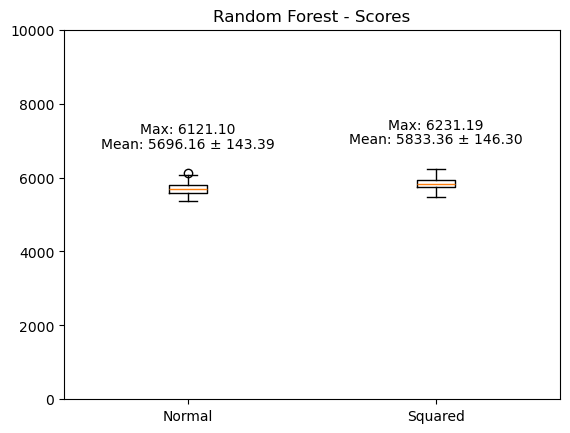

Text(2, 0.832, 'Max: 0.73')

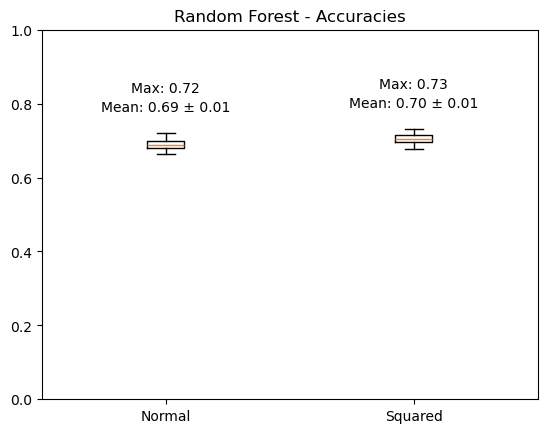

In [6]:
# Boxplot of the results

scores_normal, scores_squared = list(map(lambda x: x.score, normal_results)), list(map(lambda x: x.score, squared_results))
accuracies_normal, accuracies_squared = list(map(lambda x: x.accuracy, normal_results)), list(map(lambda x: x.accuracy, squared_results))

plt.boxplot([scores_normal, scores_squared])
plt.xticks([1, 2], ['Normal', 'Squared'])
plt.ylim(0, 10000)
plt.title('Random Forest - Scores')

# Mean and max scores on plot
plt.text(1, np.max(scores_normal) + 600, f'Mean: {np.mean(scores_normal):.2f} ± {np.std(scores_normal):.2f}', ha='center', va='bottom')
plt.text(2, np.max(scores_squared) + 600, f'Mean: {np.mean(scores_squared):.2f} ± {np.std(scores_squared):.2f}', ha='center', va='bottom')
plt.text(1, np.max(scores_normal) + 1000, f'Max: {np.max(scores_normal):.2f}', ha='center', va='bottom')
plt.text(2, np.max(scores_squared) + 1000, f'Max: {np.max(scores_squared):.2f}', ha='center', va='bottom')
plt.show()


plt.boxplot([accuracies_normal, accuracies_squared])
plt.xticks([1, 2], ['Normal', 'Squared'])
plt.ylim(0, 1)
plt.title('Random Forest - Accuracies')

# Mean and max scores on plot
plt.text(1, np.max(accuracies_normal) + 0.05, f'Mean: {np.mean(accuracies_normal):.2f} ± {np.std(accuracies_normal):.2f}', ha='center', va='bottom')
plt.text(2, np.max(accuracies_squared) + 0.05, f'Mean: {np.mean(accuracies_squared):.2f} ± {np.std(accuracies_squared):.2f}', ha='center', va='bottom')
plt.text(1, np.max(accuracies_normal) + 0.1, f'Max: {np.max(accuracies_normal):.2f}', ha='center', va='bottom')
plt.text(2, np.max(accuracies_squared) + 0.1, f'Max: {np.max(accuracies_squared):.2f}', ha='center', va='bottom')